In [ ]:
# https://archive.ics.uci.edu/ml/datasets/online+news+popularity

'''

Trying to predict the number of shares of a company depending on the popularity of news related to them. 

Drew up a pipeline to handle the data, and got better results taking the log of most variables and the y-variable. 

Tried using some algorithms, best I can get so far is R^2 of 0.06 using a knn regressor. 

'''

In [181]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime 

from sklearn import preprocessing 

In [182]:
filename_prefix = 'C://Users/Tim/Downloads/OnlineNewsPopularity/OnlineNewsPopularity/OnlineNewsPopularity.csv'

dataDF = pd.read_csv(filename_prefix) #, index_col = 'date', parse_dates = True)

cols =[c.replace(' ', '') for c in dataDF.columns]

dataDF.columns = cols

In [17]:
c = ' shares'
c.replace(' ','')

'shares'

In [96]:
dataDF

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [20]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [21]:
dataDF.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

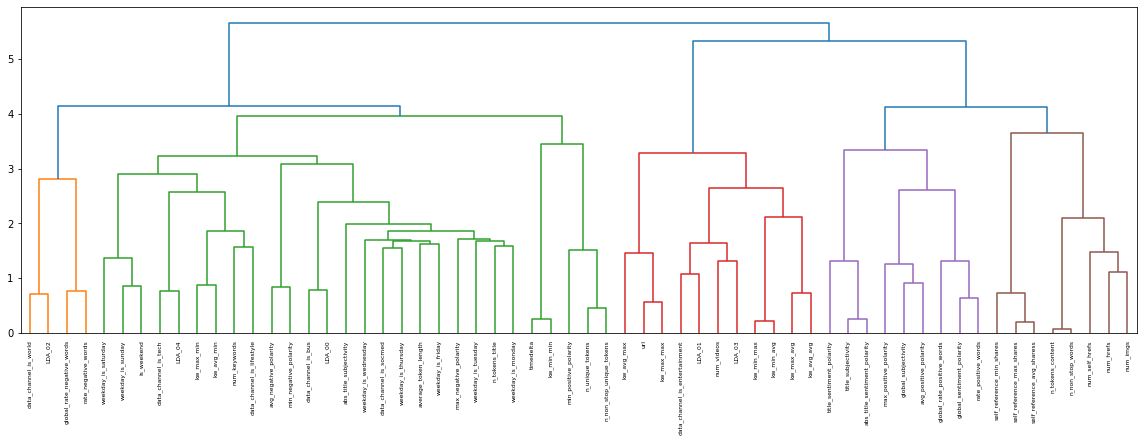

In [23]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

X= dataDF.drop(columns = ['shares'])
corr = spearmanr(X).correlation

corr_linkage = hierarchy.ward(corr)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

dendro = hierarchy.dendrogram(
    corr_linkage, labels=X.columns.tolist(), leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

In [26]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

feat_cols = list(dataDF.columns[selected_features])
feat_cols

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_max_min',
 'kw_min_max',
 'kw_avg_max',
 'kw_max_avg',
 'self_reference_min_shares',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'LDA_01',
 'LDA_03',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity']

In [30]:
dataDF.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [35]:
feat_cols = [c for c in dataDF.columns if ((c != 'url') & (c != 'shares'))]
y_label = 'shares'

In [124]:
potential_log = ['n_tokens_title', 'n_tokens_content','n_unique_tokens','n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg' , 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess']

In [176]:
dataDF['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [196]:
from sklearn import model_selection

dataDF2 = dataDF

#dataDF[potential_log] = np.log10(dataDF[potential_log] + 3)
#dataDF[potential_log] = np.log10(dataDF[potential_log])
#dataDF2[y_label] = np.log10(dataDF2[y_label])

#dataDF2 = dataDF2[dataDF2[y_label].between(-10, 10)]

Xy = dataDF2[feat_cols + [y_label]]


#X_arr = np.array(Xy.drop(columns = ['class']))
#Y_arr = np.array(Xy['class'])

X_arr = Xy.drop(columns = [y_label])
Y_arr = np.log(Xy[y_label])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_arr, Y_arr, test_size=0.30, random_state=42)

In [197]:
y_test.describe()

count    11894.000000
mean         7.474304
std          0.933406
min          2.079442
25%          6.848005
50%          7.244228
75%          7.937375
max         13.645078
Name: shares, dtype: float64

In [198]:
dataDF[dataDF.isin([np.nan, np.inf, -np.inf]).any(1)]


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


In [148]:
dataDF.index[np.isinf(dataDF).any(1)]

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
data

In [155]:
dataDF['shares'].describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name: shares, dtype: float64

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import decomposition
from sklearn import tree, ensemble, neighbors, neural_network



other_cols = [c for c in feat_cols if (c not in potential_log)]
other_transformer = Pipeline(steps=[('identity',preprocessing.FunctionTransformer())])


log_cols = [c for c in feat_cols if (c in potential_log)]
log10_transformer =Pipeline(steps=[('log10', preprocessing.FunctionTransformer(np.log10))])

preprocessor = ColumnTransformer(
    transformers=[('other', other_transformer, other_cols), ('log', log10_transformer, log_cols)])


clf = Pipeline(steps=[('preprocessor', preprocessor), #('pca', decomposition.PCA()),
                      ('regressor', ensemble.GradientBoostingRegressor())])



In [108]:
Xy = preprocessor.fit_transform(Xy)

In [ ]:
dataDF2 = dataDF

In [141]:
X_train

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
14253,456.0,1.041393,2.893762,0.539815,0.60206,0.568511,1.041393,0.602060,0.602060,0.0,...,0.476070,0.100000,1.0,-0.175694,-0.291667,-0.125,0.400000,-0.050,0.100000,0.050
33747,99.0,0.954243,3.124178,0.536152,0.60206,0.558063,1.544068,1.113943,0.845098,0.0,...,0.384975,0.033333,0.8,-0.196354,-0.400000,-0.100,0.850000,0.250,0.350000,0.250
39518,10.0,1.230449,2.970812,0.544273,0.60206,0.567904,1.079181,0.903090,0.602060,0.0,...,0.477640,0.033333,1.0,-0.363725,-1.000000,-0.050,0.050000,-0.200,0.450000,0.200
23460,269.0,1.041393,2.413300,0.554768,0.60206,0.579317,1.176091,0.903090,0.477121,0.0,...,0.292267,0.100000,0.5,-0.550000,-1.000000,-0.100,0.000000,0.000,0.500000,0.000
1142,711.0,1.079181,2.276462,0.561825,0.60206,0.583940,0.698970,0.602060,0.477121,0.0,...,0.429966,0.100000,1.0,-0.100000,-0.100000,-0.100,0.850000,0.450,0.350000,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,616.0,1.041393,2.100371,0.570960,0.60206,0.586492,0.778151,0.477121,0.477121,1.0,...,0.352778,0.166667,0.6,0.000000,0.000000,0.000,0.000000,0.000,0.500000,0.000
11284,516.0,1.146128,2.344392,0.559235,0.60206,0.570101,1.230449,0.698970,1.113943,0.0,...,0.510606,0.250000,1.0,-0.147917,-0.187500,-0.050,0.694444,0.375,0.194444,0.375
38158,35.0,1.146128,2.243038,0.564271,0.60206,0.577112,0.903090,0.778151,0.698970,0.0,...,0.357143,0.214286,0.5,-0.104233,-0.400000,-0.050,0.150000,-0.050,0.350000,0.050
860,716.0,1.000000,1.968483,0.587168,0.60206,0.593627,0.845098,0.778151,0.477121,2.0,...,0.386667,0.100000,0.5,-0.200000,-0.200000,-0.200,0.500000,0.250,0.000000,0.250


In [222]:
from sklearn import tree, ensemble, neighbors, neural_network

#clf = ensemble.GradientBoostingRegressor(n_estimators = 300, max_depth = 5)

parameters = {'n_neighbors': [5, 10, 30], 'weights': ['uniform', 'distance']}
clf =  neighbors.KNeighborsRegressor(n_neighbors = 30)

clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [223]:
score = clf.score(X_test, y_test)
score

0.05447243055492168

In [224]:
y_pred = clf.predict(X_test)

In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import math

# report performance
mse = mean_squared_error(y_test, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 0.8237184513998506
MAE: 0.6784492770096955
RMSE: 0.9075893627626156
MAPE: 0.0892368841157834


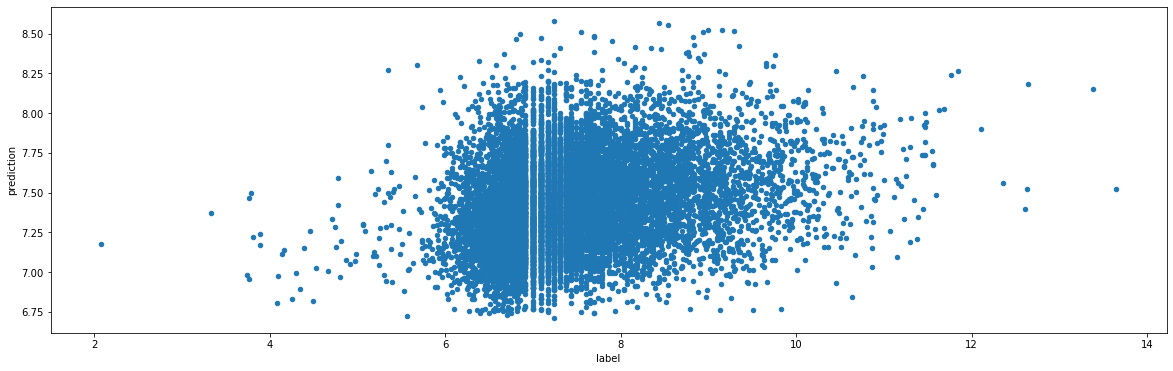

In [226]:
resultsDF = pd.DataFrame(zip(y_test, y_pred), columns = ['label', 'prediction'])
resultsDF.plot.scatter(x = 'label', y = 'prediction')

In [216]:
resultsDF

,label,prediction
0,7.972466,7.328887
1,7.170120,6.828552
2,9.781320,7.489008
3,7.313220,7.209567
4,7.244228,7.124772
...,...,...
11889,8.188689,8.010886
11890,7.003065,6.840748
11891,7.090077,7.741167
11892,6.287859,7.337270


In [76]:
dataDF2 = dataDF
dataDF2[potential_log] = dataDF[potential_log] + 2
dataDF2[potential_log].describe() #.iloc[:, 40:]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,12.398749,548.514731,2.548216,2.996469,2.689175,12.883690,5.293638,6.544143,28.106801,1155.951682,314.366967,13614.354102,752326.066694,259283.938083,1119.146610,5659.211151,3137.858639,4000.755396,10331.212662,6403.697580
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231
min,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,11.000000,248.000000,2.470870,3.000000,2.625739,6.000000,3.000000,3.000000,1.000000,447.000000,143.750000,2.000000,843302.000000,172848.875000,2.000000,3564.101631,2384.448566,641.000000,1102.000000,983.187500
50%,12.000000,411.000000,2.539226,3.000000,2.690476,10.000000,5.000000,3.000000,1.000000,662.000000,237.500000,1402.000000,843302.000000,244574.222223,1025.635611,4357.688836,2872.074878,1202.000000,2802.000000,2202.000000
75%,14.000000,718.000000,2.608696,3.000000,2.754630,16.000000,6.000000,6.000000,6.000000,1002.000000,359.000000,7902.000000,843302.000000,330982.000000,2058.781032,6021.953968,3602.229564,2602.000000,8002.000000,5202.000000
max,25.000000,8476.000000,703.000000,1044.000000,652.000000,306.000000,118.000000,130.000000,379.000000,298402.000000,42829.857143,843302.000000,843302.000000,843302.000000,3615.039820,298402.000000,43569.659946,843302.000000,843302.000000,843302.000000


(array([ 93.,  95., 105., ...,   0.,   0.,   1.]),
 array([1.00000000e+00, 1.09742618e+02, 2.18485235e+02, ...,
        8.43082515e+05, 8.43191257e+05, 8.43300000e+05]),
 <a list of 7755 Patch objects>)

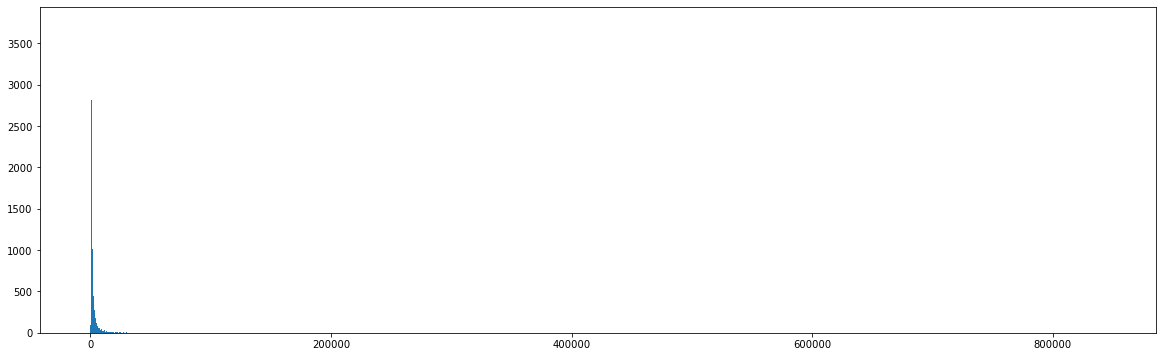

In [28]:
import matplotlib.pyplot as plt

plt.hist(np.array(dataDF['shares']), bins= 'auto')

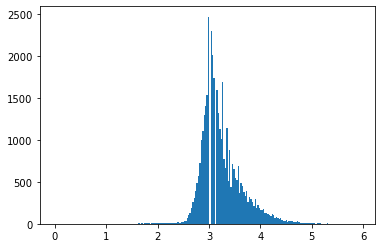

In [14]:
import matplotlib.pyplot as plt

plt.hist(np.array(np.log10(dataDF['shares'])), bins= 'auto')

In [205]:
feat_impDF = pd.DataFrame(zip(feat_cols, clf.feature_importances_), columns = ['feature', 'importance'])

feat_impDF.sort_values('importance', ascending = False)

,feature,importance
26,kw_avg_avg,0.260327
29,self_reference_avg_sharess,0.085013
27,self_reference_min_shares,0.077993
0,timedelta,0.076658
25,kw_max_avg,0.065116
37,is_weekend,0.049819
13,data_channel_is_entertainment,0.034664
6,num_hrefs,0.032864
16,data_channel_is_tech,0.032694
3,n_unique_tokens,0.029633
